In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [10]:
from os.path import dirname, basename
import json
from glob import glob
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from joblib import delayed, Parallel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib_pretty_tex as pgf

In [4]:
import utils

In [5]:
sns.set_style('whitegrid')

In [5]:
fit_params = {
    'IP3D': {
        'Nominal': (23.697853380478435, 16.084494195489654),
        'tip_x=0um_y=+1000um': (23.634300869978127, 17.339544336284494),
        'tip_x=0um_y=+1000um_sigma=0.5': (34.692062073707248, 53.83247392946393),
        'tip_x=0um_y=+100um': (23.729979535746097, 16.047766132879236),
        'tip_x=0um_y=+100um_sigma=0.5': (23.926255613866182, 16.368717786357102),
        'tip_x=0um_y=+250um': (23.732814351810557, 15.988278876256496),
        'tip_x=0um_y=+250um_sigma=0.5': (25.651573665779434, 17.088931155603937),
        'tip_x=0um_y=+500um': (23.714582948598412, 16.197427616641466),
        'tip_x=0um_y=+500um_sigma=0.5': (28.021516394104065, 22.393338427612655),
        'tip_x=0um_y=-1000um': (23.127064226401373, 18.941007152954537),
        'tip_x=0um_y=-1000um_sigma=0.5': (30.277428009640783, 34.809119941516137),
        'tip_x=0um_y=-100um': (23.69521034307428, 16.161294963906666),
        'tip_x=0um_y=-100um_sigma=0.5': (23.860725354404334, 16.531984944323476),
        'tip_x=0um_y=-250um': (23.732762716586947, 16.220397618423259),
        'tip_x=0um_y=-250um_sigma=0.5': (24.916820811453725, 18.087126570062196),
        'tip_x=0um_y=-500um': (23.503950155418096, 16.981869001201346),
        'tip_x=0um_y=-500um_sigma=0.5': (28.097955512436322, 28.829944569734554)},
    'IPx': {
        'Nominal': (15.917190362824627, 9.9187928249785493),
        'tip_x=0um_y=+1000um': (15.61139816986636, 11.760944395581353),
        'tip_x=0um_y=+1000um_sigma=0.5': (22.070051934910058, 33.479362568795707),
        'tip_x=0um_y=+100um': (16.018235665121544, 9.6724974943746833),
        'tip_x=0um_y=+100um_sigma=0.5': (15.935913959049078, 10.183834633115326),
        'tip_x=0um_y=+250um': (15.948312953051598, 9.7121258892185089),
        'tip_x=0um_y=+250um_sigma=0.5': (16.970075685454358, 10.320711944368696),
        'tip_x=0um_y=+500um': (15.803532624612505, 10.143232324204313),
        'tip_x=0um_y=+500um_sigma=0.5': (18.563519953216261, 13.762944390343071),
        'tip_x=0um_y=-1000um': (15.496131328762143, 12.737190532139271),
        'tip_x=0um_y=-1000um_sigma=0.5': (19.21816597381056, 21.332978743856302),
        'tip_x=0um_y=-100um': (15.844628229012232, 10.130619625252086),
        'tip_x=0um_y=-100um_sigma=0.5': (16.202230258957115, 9.9429932245324508),
        'tip_x=0um_y=-250um': (15.89413952490016, 10.114073099413181),
        'tip_x=0um_y=-250um_sigma=0.5': (16.673356098604366, 10.843013890002849),
        'tip_x=0um_y=-500um': (15.64349925915637, 11.118300718600588),
        'tip_x=0um_y=-500um_sigma=0.5': (18.27989017447705, 17.437839095066671)},
    'IPy': {
        'Nominal': (15.49230935521401, 10.268646699376154),
        'tip_x=0um_y=+1000um': (15.570227620450144, 10.503402251757),
        'tip_x=0um_y=+1000um_sigma=0.5': (21.50985344622044, 29.874544572769434),
        'tip_x=0um_y=+100um': (15.52662565475746, 10.245222429037828),
        'tip_x=0um_y=+100um_sigma=0.5': (15.712304926854236, 10.497535789437833),
        'tip_x=0um_y=+250um': (15.464217686060117, 10.426027182059876),
        'tip_x=0um_y=+250um_sigma=0.5': (16.558166829615303, 11.33747514184102),
        'tip_x=0um_y=+500um': (15.503261384724528, 10.392752857329377),
        'tip_x=0um_y=+500um_sigma=0.5': (17.969889455665136, 14.151264858943319),
        'tip_x=0um_y=-1000um': (15.510475851273416, 10.702080007067032),
        'tip_x=0um_y=-1000um_sigma=0.5': (19.956986567392036, 20.162823806044447),
        'tip_x=0um_y=-100um': (15.544149278518566, 10.124180862361408),
        'tip_x=0um_y=-100um_sigma=0.5': (15.754467962606697, 10.381076153809428),
        'tip_x=0um_y=-250um': (15.547581601747826, 10.198136921146718),
        'tip_x=0um_y=-250um_sigma=0.5': (16.05983101928161, 11.900494671734595),
        'tip_x=0um_y=-500um': (15.571946567360678, 10.273773030784518),
        'tip_x=0um_y=-500um_sigma=0.5': (19.022292720264595, 17.397314932755741)}
}

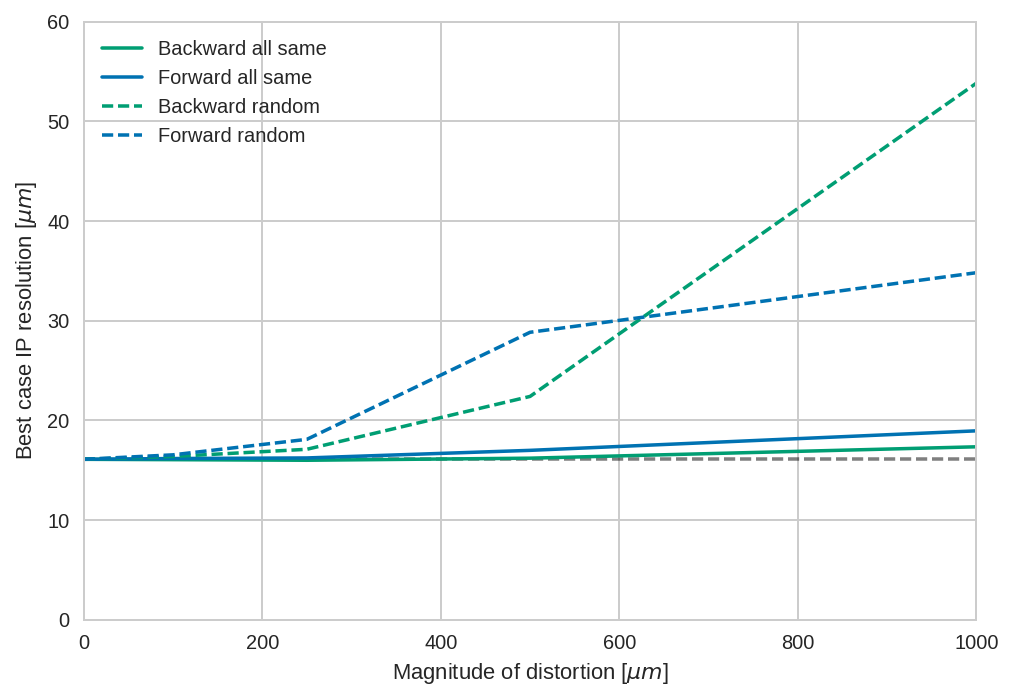

In [6]:
nominal_resolution = fit_params['IP3D']['Nominal'][1]
plt.axhline(nominal_resolution, ls='--', c='k', alpha=0.5)
for sigma, sign in [('', '+'), ('', '-'), ('_sigma=0.5', '+'), ('_sigma=0.5', '-')]:
    xs = [100, 250, 500, 1000]
    ys = [fit_params['IP3D'][f'tip_x=0um_y={sign}{x}um{sigma}'][1] for x in xs]
    plt.plot(
        [0]+xs, [nominal_resolution]+ys,
        ls='--' if sigma else '-',
        c=sns.color_palette('colorblind', 2)[sign == '+'],
        label=f'{["Forward", "Backward"][sign == "+"]} {["all same", "random"][bool(sigma)]}'
    )
plt.xlim(0, 1000)
plt.ylim(0, 60)
plt.xlabel('Magnitude of distortion [$\mu m$]')
plt.ylabel('Best case IP resolution [$\mu m$]')
plt.legend(loc='best')
pgf.savefig('IP_resolution_vs_distortion.pgf.png')

D0_vertex_chi2.pgf.png
dst_vertex_z-pv_z.pgf.png
flight_distance_resolution.pgf.png
momentum_resolution_integrated.pgf.png
momentum_resolution_vs_momentum.pgf.png
proper_lifetime_resolution.pgf.png
reco_d0_lifetime.json
reco_d0_lifetime.pgf.png
reconstructed_flight_distance.pgf.png
reconstructed_proper_lifetime.pgf.png
residual_IP3D.pgf.png
residual_IPx.pgf.png
residual_IPy.pgf.png
residual_x_integrated.pgf.png
residual_x_vs_z.pgf.png
residual_y_integrated.pgf.png
residual_y_vs_z.pgf.png
residual_z_integrated.pgf.png
residual_z_vs_z.pgf.png
true_flight_distance.pgf.png
true_proper_lifetime.pgf.png
true_residual_x_vs_z_left_right_Original_DB.pgf.png
true_residual_x_vs_z_left_right_tip_x=0um_y=-1000um_alternate.pgf.png
true_residual_x_vs_z_left_right_tip_x=0um_y=+1000um_alternate.pgf.png
true_residual_x_vs_z.pgf.png
true_residual_y_vs_z_left_right_Original_DB.pgf.png
true_residual_y_vs_z_left_right_tip_x=0um_y=-1000um_alternate.pgf.png
true_residual_y_vs_z_left_right_tip_x=0um_y=+1000um_

In [26]:
lifetimes = {'Nominal': {}}
for fn in glob('output/*/further_studies/reco_d0_lifetime.json'):
    with open(fn, 'rt') as fp:
        _results = json.load(fp)
    for k, v in _results.items():
        if k == 'Nominal':
            for _k, _v in _results.items():
                if _k != 'Nominal':
                    lifetimes[k][_k] = v[1]
        else:
            lifetimes[k] = v[1]
lifetimes

{'Nominal': {'tip_x=0um_y=+1000um': 0.4049804687499994,
  'tip_x=0um_y=+1000um_alternate': 0.4071289062499994,
  'tip_x=0um_y=+1000um_sigma=0.5': 0.40703124999999946,
  'tip_x=0um_y=+1000um_sigma=0.5_alternate': 0.4071289062499994,
  'tip_x=0um_y=+100um': 0.40439453124999947,
  'tip_x=0um_y=+100um_sigma=0.5': 0.40527343749999944,
  'tip_x=0um_y=+250um': 0.4048828124999994,
  'tip_x=0um_y=+250um_sigma=0.5': 0.4048828124999994,
  'tip_x=0um_y=+500um': 0.40585937499999947,
  'tip_x=0um_y=+500um_sigma=0.5': 0.4061523437499994,
  'tip_x=0um_y=-1000um': 0.4049804687499994,
  'tip_x=0um_y=-1000um_alternate': 0.4071289062499994,
  'tip_x=0um_y=-1000um_sigma=0.5': 0.40703124999999946,
  'tip_x=0um_y=-1000um_sigma=0.5_alternate': 0.4071289062499994,
  'tip_x=0um_y=-100um': 0.40439453124999947,
  'tip_x=0um_y=-100um_sigma=0.5': 0.40527343749999944,
  'tip_x=0um_y=-250um': 0.4048828124999994,
  'tip_x=0um_y=-250um_sigma=0.5': 0.4048828124999994,
  'tip_x=0um_y=-500um': 0.40585937499999947,
  'tip_

In [19]:
lifetimes = {
    'Nominal': 0.49226085575382916,
    'tip_x=0um_y=+1000um': 0.49094277486031934,
    'tip_x=0um_y=+1000um_sigma=0.5': 0.5651536679086632,
    'tip_x=0um_y=+100um': 0.49128602617462735,
    'tip_x=0um_y=+100um_sigma=0.5': 0.4898808549956828,
    'tip_x=0um_y=+250um': 0.48983875882055816,
    'tip_x=0um_y=+250um_sigma=0.5': 0.494961701524005,
    'tip_x=0um_y=+500um': 0.4902193053103896,
    'tip_x=0um_y=+500um_sigma=0.5': 0.50091164023445,
    'tip_x=0um_y=-1000um': 0.4909268031289272,
    'tip_x=0um_y=-1000um_sigma=0.5': 0.514928339750569,
    'tip_x=0um_y=-100um': 0.4914824097980971,
    'tip_x=0um_y=-100um_sigma=0.5': 0.4905734004867145,
    'tip_x=0um_y=-250um': 0.49258027849224206,
    'tip_x=0um_y=-250um_sigma=0.5': 0.4902445378180367,
    'tip_x=0um_y=-500um': 0.493229082672899,
    'tip_x=0um_y=-500um_sigma=0.5': 0.5136084708705284
}

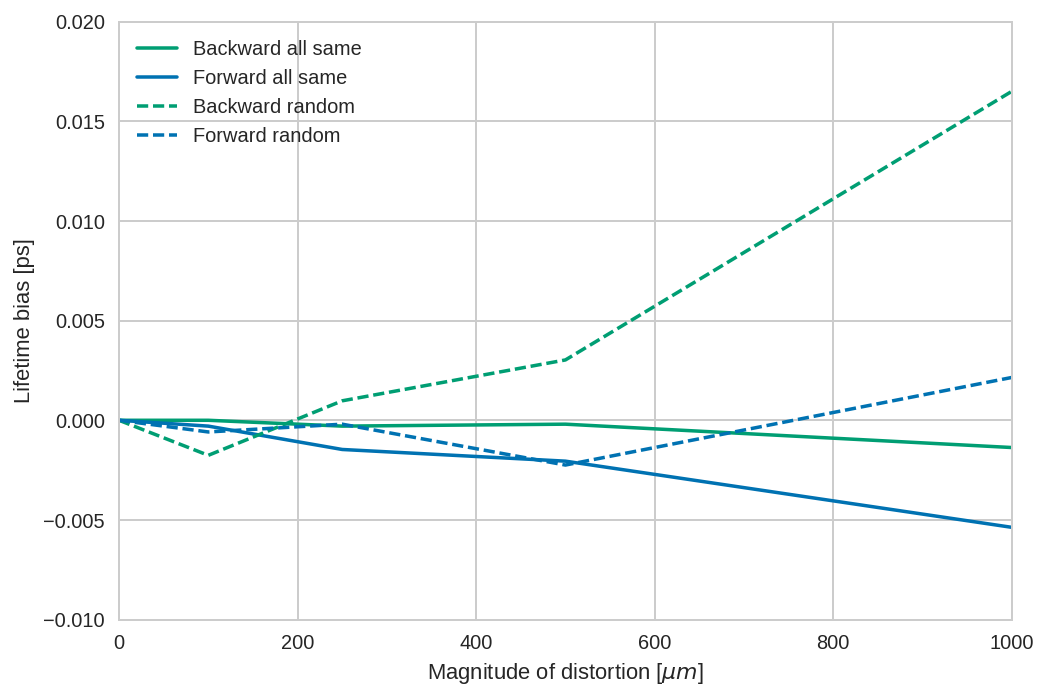

In [28]:
nominal_lifetime = lifetimes['Nominal']
for sigma, sign in [('', '+'), ('', '-'), ('_sigma=0.5', '+'), ('_sigma=0.5', '-')]:
    xs = [100, 250, 500, 1000]
    ys = [lifetimes[f'tip_x=0um_y={sign}{x}um{sigma}']-nominal_lifetime[f'tip_x=0um_y={sign}{x}um{sigma}']
          for x in xs]
    plt.plot(
        [0]+xs, [0]+ys,
        ls='--' if sigma else '-',
        c=sns.color_palette('colorblind', 2)[sign == '+'],
        label=f'{["Forward", "Backward"][sign == "+"]} {["all same", "random"][bool(sigma)]}'
    )
plt.xlim(0, 1000)
plt.ylim(-0.01, 0.02)
plt.xlabel('Magnitude of distortion [$\mu m$]')
plt.ylabel('Lifetime bias [ps]')
plt.legend(loc='best')
pgf.savefig('output/Lifetime_bias_vs_distortion.pgf.png')